In [3]:
from scipy import io
import numpy as np
import h5py

def read():
    mat = io.loadmat('./2022-05-05/summary_data.mat')
    #f = h5py.File('./2022-05-05/summary_data.mat','r')
    
    #data = f.get('dataRb')
    


    return mat

mat = read()
dataRb = mat['dataRb']
print(type(dataRb))
print(dataRb[-1][0])
print(int(dataRb[-1][0]))
pkOD, NRb = float(dataRb[-1][3]), float(dataRb[-1][8])
print(pkOD)
print(NRb)


<class 'numpy.ndarray'>
['113']
113
911.8
12670.0


In [37]:
import datetime

x = datetime.datetime.now()

print(x.strftime("%G") + '-' + x.strftime("%m") + '-' + x.strftime("%d") + "/summary_data.mat"	)


2022-09-11/summary_data.mat


In [7]:
import matlab.engine
names = matlab.engine.find_matlab()

names

()

In [31]:
import matlab.engine
eng = matlab.engine.connect_matlab()

#eng.testing(1)

In [46]:
def callMe():
    print("Eh")


s = eng.testing(1,1 )
#eng.runScan("@mainHighB", 4, 'random', 1)
#eng.runScan("@mainHighB", 4, 'random', 1)

print(s)

1.0


In [30]:
eng.quit()


In [60]:
import os
path  = rf"{os.getcwd()}".encode('unicode_escape').decode()
os.system(f"matlab -nosplash -nodesktop -r \"cd('{path}'), testing(@callMe, 1), exit\"")
#print("Hello")

c:\\Users\\jeshu\\Documents\\Harvard\\Labs\\NiLabRotation\\MloopEvap


matlab -nosplash -nodesktop -r "cd('C:\Users\jeshu\Documents\Harvard\Labs\NiLabRotation\MloopEvap'), testing(@callMe, 1), exit"
matlab -nosplash -nodesktop -r "cd('C:\\Users\\jeshu\\Documents\\Harvard\\Labs\\NiLabRotation\\MloopEvap'), testing(@callMe, 1), exit"

In [65]:
def write(params):
    #Input Fcut (length = 5) tTotal (scalar) amp (length = 5) A (length = 15)

    io.savemat('test.mat',{'fcut':params[0:5], 'tTotal': params[5], 'amp': params[6:11], 'A': params[11:len(params)]})

params = np.random.rand(26)
write(params)

print(params)


[0.26438472 0.11302368 0.9033664  0.0178923  0.04025816 0.91760688
 0.80007933 0.55318397 0.53378827 0.37098231 0.80043079 0.48638923
 0.15371566 0.06227971 0.03428273 0.71734513 0.15513876 0.13226674
 0.72300119 0.81853886 0.91810575 0.74304865 0.75663242 0.79163164
 0.01973999 0.17528025]


INFO     M-LOOP version 3.3.1
INFO     Optimization started.
INFO     Run:1 (training)
INFO     params [-0.84142831 -0.12449408 -1.72005599]
INFO     cost -0.9172229673303696 +/- 0.0
INFO     Run:2 (training)
INFO     params [-1.51197484  1.376154    0.45753175]
INFO     cost -0.16099659540673694 +/- 0.0
INFO     Run:3 (training)
INFO     params [-0.00931098 -1.04903792 -1.91034366]
INFO     cost -0.7761650342969274 +/- 0.0
INFO     Run:4 (training)
INFO     params [-1.64967753 -1.40818348 -1.20851832]
INFO     cost 0.47900583562685284 +/- 0.0
INFO     Run:5 (training)
INFO     params [ 1.46457536 -0.69299377  1.46023111]
INFO     cost 0.17333926050278098 +/- 0.0
INFO     Run:6 (training)
INFO     params [1.5349645  1.06914085 1.80740982]
INFO     cost 0.22219180905029978 +/- 0.0
INFO     Run:7 (training)
INFO     params [ 1.75404477 -1.37439234 -0.58227474]
INFO     cost -0.31712153446096836 +/- 0.0
INFO     Run:8 (training)
INFO     params [ 0.76129488  1.31272552 -0.9856974 ]
INFO  

FileNotFoundError: [Errno 2] No such file or directory: './M-LOOP_archives/learner_archive_2022-09-12_17-20.txt'

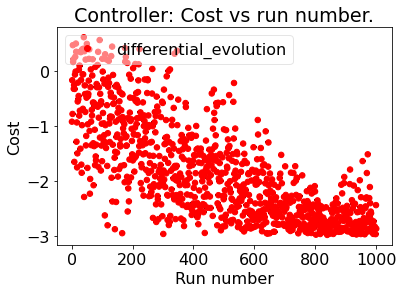

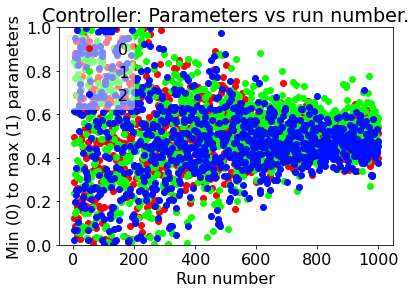

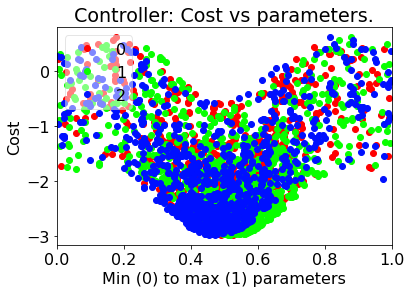

In [11]:

#Imports for M-LOOP
import mloop.interfaces as mli
import mloop.controllers as mlc
import mloop.visualizations as mlv

#Other imports
import numpy as np
import time

#Declare your custom class that inherits from the Interface class
class CustomInterface(mli.Interface):
    
    #Initialization of the interface, including this method is optional
    def __init__(self):
        #You must include the super command to call the parent class, Interface, constructor 
        super(CustomInterface,self).__init__()
        
        #Attributes of the interface can be added here
        #If you want to precalculate any variables etc. this is the place to do it
        #In this example we will just define the location of the minimum
        self.minimum_params = np.array([0,0.1,-0.1])
        
    #You must include the get_next_cost_dict method in your class
    #this method is called whenever M-LOOP wants to run an experiment
    def get_next_cost_dict(self,params_dict):
        
        #Get parameters from the provided dictionary
        params = params_dict['params']
        
        #Here you can include the code to run your experiment given a particular set of parameters
        #In this example we will just evaluate a sum of sinc functions
        cost = -np.sum(np.sinc(params - self.minimum_params))
        #There is no uncertainty in our result
        uncer = 0
        #The evaluation will always be a success
        bad = False
        #Add a small time delay to mimic a real experiment
        time.sleep(1)
        
        #The cost, uncertainty and bad boolean must all be returned as a dictionary
        #You can include other variables you want to record as well if you want
        cost_dict = {'cost':cost, 'uncer':uncer, 'bad':bad}
        return cost_dict
    
def main():
    #M-LOOP can be run with three commands
    
    #First create your interface
    interface = CustomInterface()
    #Next create the controller. Provide it with your interface and any options you want to set
    controller = mlc.create_controller(interface,
                                       controller_type='neural_net', 
                                       max_num_runs = 1000,
                                       target_cost = -2.99,
                                       num_params = 3, 
                                       min_boundary = [-2,-2,-2],
                                       max_boundary = [2,2,2])
    #To run M-LOOP and find the optimal parameters just use the controller method optimize
    controller.optimize()
    
    #The results of the optimization will be saved to files and can also be accessed as attributes of the controller.
    print('Best parameters found:')
    print(controller.best_params)
    
    #You can also run the default sets of visualizations for the controller with one command
    mlv.show_all_default_visualizations(controller)
    

#Ensures main is run when this code is run as a script
if __name__ == '__main__':
    main()